<a href="https://colab.research.google.com/github/mashrur-rahman-fahim/Machine_learning_projects/blob/main/digitRec(0_9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
plt.style.use('ggplot')

In [18]:
def my_softmax(x):
  e_x=np.exp(x)
  return e_x/np.sum(e_x)

In [19]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]


In [57]:
x=np.load('X_w2.npy')
y=np.load('y_w2.npy')
print(y.shape)
x.shape

(5000, 1)


(5000, 400)

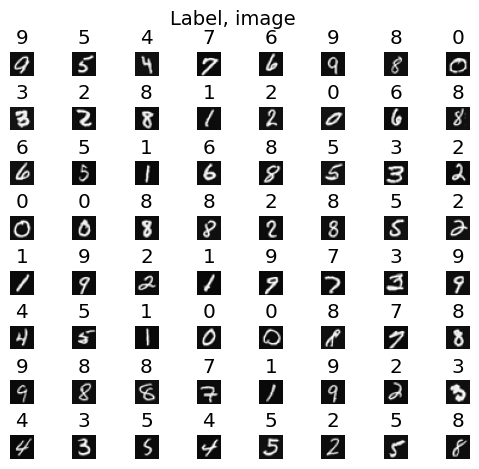

In [32]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = x.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [33]:
tf.random.set_seed(1234)
model=Sequential([
    tf.keras.Input(shape=(400,)),
    Dense(25,activation='relu',name='l1'),
    Dense(15,activation='relu',name='l2'),
    Dense(10,activation='linear',name='l3')
])
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001)
)
model.fit(
    x,y,
    epochs=100,verbose=0
)

In [53]:

y_lin=model.predict(x)
prob=tf.nn.softmax(y_lin)#though this is lnr so it makes it into probability

print(np.argmax(prob[1015]),y[1015])#argmax give the largest prob among 10 column





157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2 [2]


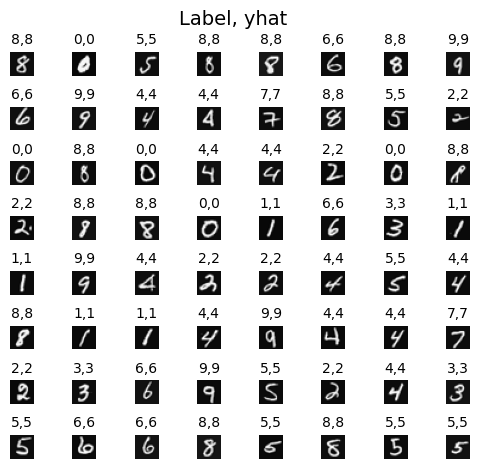

In [54]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = x.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = model.predict(x[random_index].reshape(1,400), verbose=0)
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)

    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [60]:
c=0

for i in range (y.shape[0]):
  y_hat=np.argmax(prob[i])
  if y_hat!=y[i]:
    c+=1
print('error: ',c)

error:  0
